# Weight Agnostic Neural Networks

# GA operations

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')
os.getcwd()

'C:\\Users\\baraujo\\OneDrive - TECHNIPFMC\\Documents\\Mestrado\\ML-Poggi\\wann\\wann2\\brain-tokyo-workshop\\WANNRelease\\WANN'

In [2]:
from wann_src.wann import loadHyp, updateHyp, Wann # WANN evolution
from wann_src.dataGatherer import DataGatherer
from wann_src.task import Task

from wann_src.ind import Ind, getNodeOrder, act, selectAct, getLayer
from wann_train import gatherData

from domain import *   # Task environments
from domain.config import games

from vis.viewInd import viewPop, viewInd

## Parameters

In [3]:
fileName    = 'test'
hyp_default = 'p/default_wan.json'
hyp_adjust = 'p/xor.json'

In [4]:
hyp = loadHyp(pFileName=hyp_default)
updateHyp(hyp,hyp_adjust)

hyp['popSize'] = 200

data = DataGatherer(fileName, hyp)

	*** Running with hyperparameters:  p/xor.json 	***


In [5]:
# Slave -- Evaluate network

def evaluatePop(pop, sameSeedForEachIndividual=True, verbose=False):
    global hyp  
    task = Task(games[hyp['task']], nReps=hyp['alg_nReps'], verbose=verbose)
    
    # Set same seed for each individual
    if sameSeedForEachIndividual is False:
        seed = np.random.randint(1000, size=len(pop))
    else:
        seed = np.random.randint(1000)
    
    reward = np.empty( (len(pop),hyp['alg_nVals']), dtype=np.float64)
    for i in range(len(pop)):
        if verbose:
            print("Evaluating Individual {}".format(i))
        ind = pop[i]
        wVec   = ind.wMat.flatten()
        aVec   = ind.aVec.flatten()
        
        if sameSeedForEachIndividual is False:
            result = task.getDistFitness(wVec,aVec,hyp,seed=seed.item(i))
        else:
            result = task.getDistFitness(wVec,aVec,hyp,seed=seed)
        reward[i,:] = result
    return reward

## Initialize WANN

In [6]:
wann = Wann(hyp)
pop = wann.ask()  

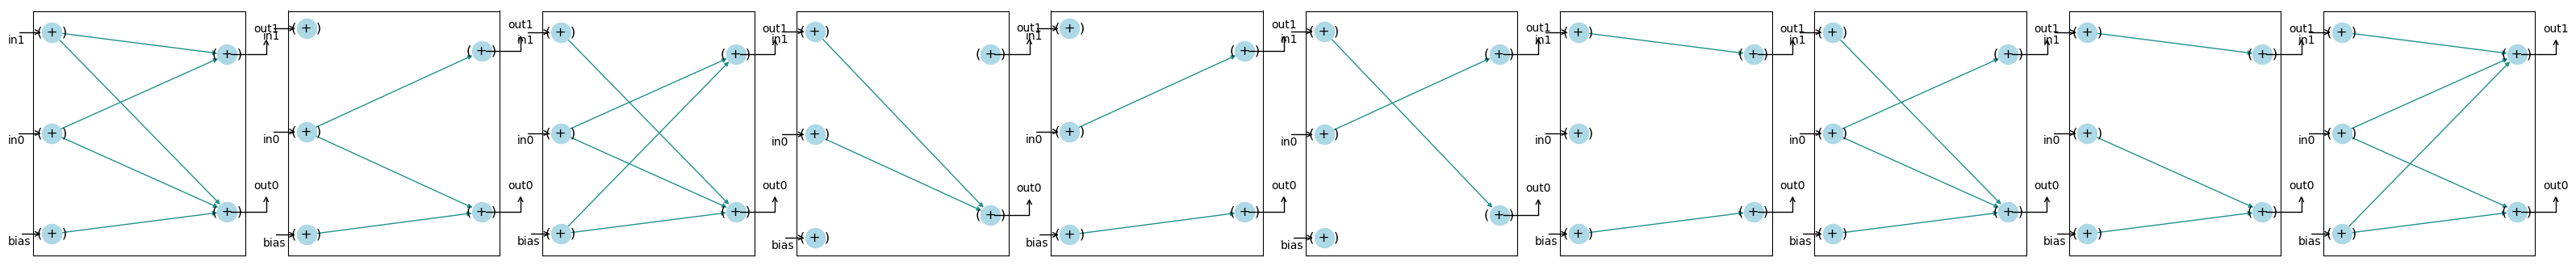

In [7]:
fig = viewPop(pop[:10], 'xor', plt_height=4)

## Evolve 1 generation

In [8]:
prev_pop = pop

In [9]:
reward = evaluatePop(pop)  # Send pop to evaluate
wann.tell(reward)           # Send fitness to WANN    
pop = wann.ask()  

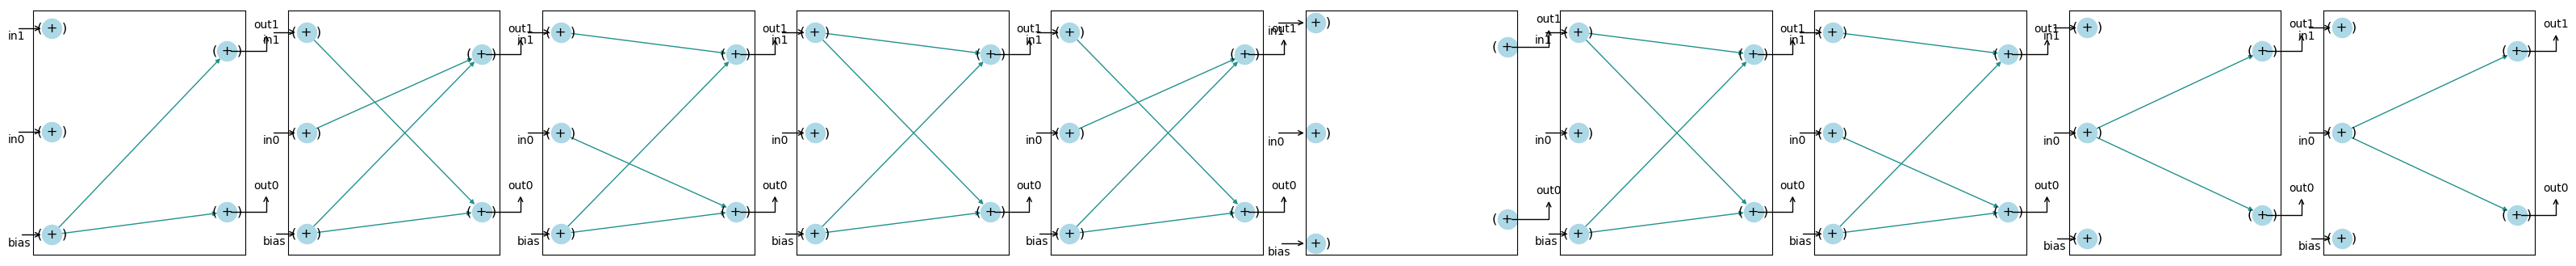

In [10]:
fig = viewPop(pop[:10], 'xor', plt_height=4)

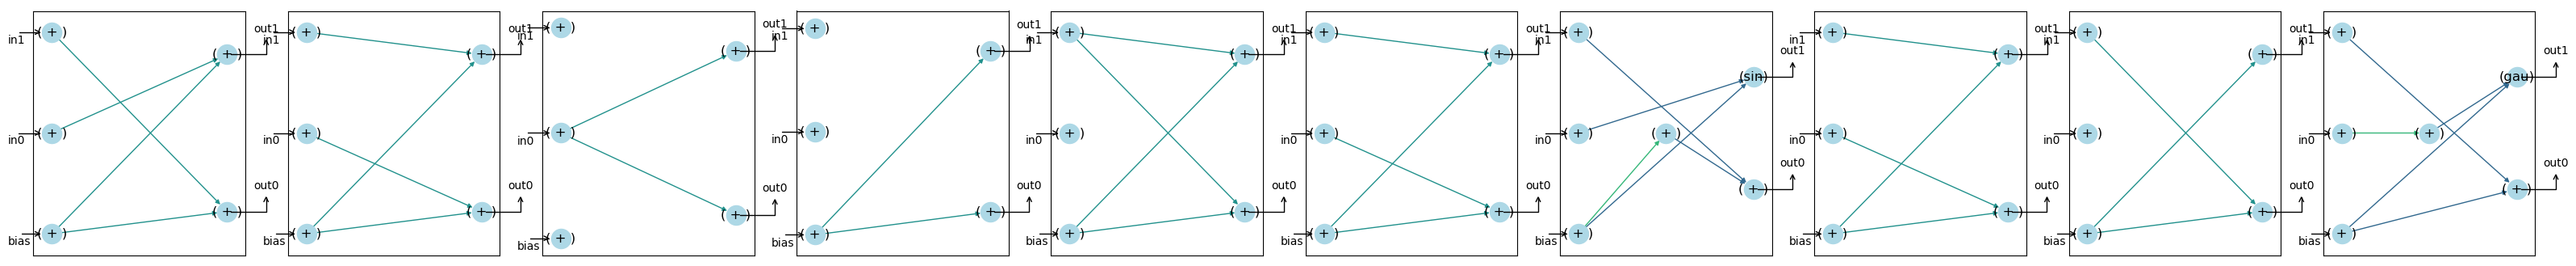

In [11]:
fig = viewPop(pop[-10:], 'xor', plt_height=4)

## Mutate Add Node

connG    - (np_array) - connection genes

           [5 X nUniqueGenes] 
           [0,:] == Innovation Number (unique Id)
           [1,:] == Source Node Id
           [2,:] == Destination Node Id
           [3,:] == Weight Value
           [4,:] == Enabled?  

nodeG    - (np_array) - node genes

           [3 X nUniqueGenes]
           [0,:] == Node Id
           [1,:] == Type (1=input, 2=output 3=hidden 4=bias)
           [2,:] == Activation function (as int)

innov    - (np_array) - innovation record

           [5 X nUniqueGenes]
           [0,:] == Innovation Number
           [1,:] == Source
           [2,:] == Destination
           [3,:] == New Node?
           [4,:] == Generation evolved
           
gen      - (int) - current generation

In [12]:
from wann_src._variation import mutAddNode

# of Connections in ANN:  2


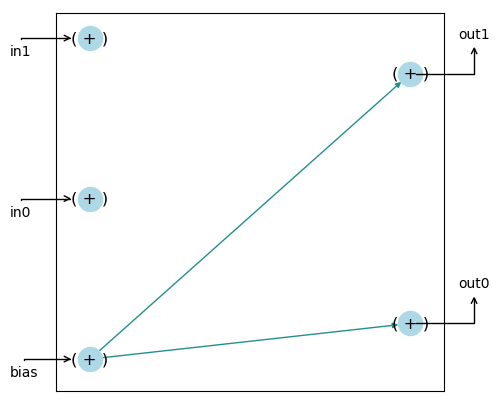

In [13]:
idx = 0 #np.random.randint(len(pop))
ind = pop[idx]

fig = viewInd(ind, 'xor', plt_height=5)

# of Connections in ANN:  3


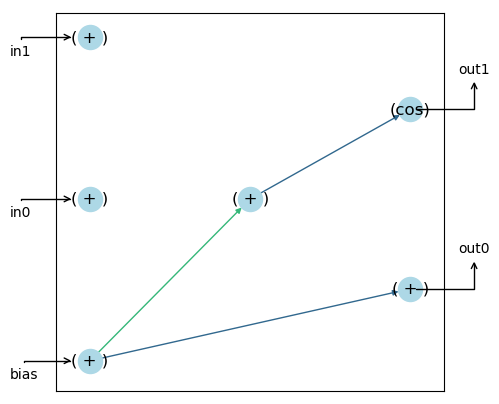

In [14]:
connG = ind.conn
nodeG = ind.node
innov = wann.innov
gen = 0

connG, nodeG, innov = wann.mutAddNode(connG, nodeG, innov, gen)
mutInd = Ind(connG, nodeG)

fig = viewInd(mutInd, 'xor', plt_height=5)

## Mutate Add Connection

connG    - (np_array) - connection genes

           [5 X nUniqueGenes] 
           [0,:] == Innovation Number (unique Id)
           [1,:] == Source Node Id
           [2,:] == Destination Node Id
           [3,:] == Weight Value
           [4,:] == Enabled?  

nodeG    - (np_array) - node genes

           [3 X nUniqueGenes]
           [0,:] == Node Id
           [1,:] == Type (1=input, 2=output 3=hidden 4=bias)
           [2,:] == Activation function (as int)

innov    - (np_array) - innovation record

           [5 X nUniqueGenes]
           [0,:] == Innovation Number
           [1,:] == Source
           [2,:] == Destination
           [3,:] == New Node?
           [4,:] == Generation evolved
           
gen      - (int) - current generation

In [15]:
from wann_src._variation import mutAddConn

In [16]:
ind = mutInd

# of Connections in ANN:  3


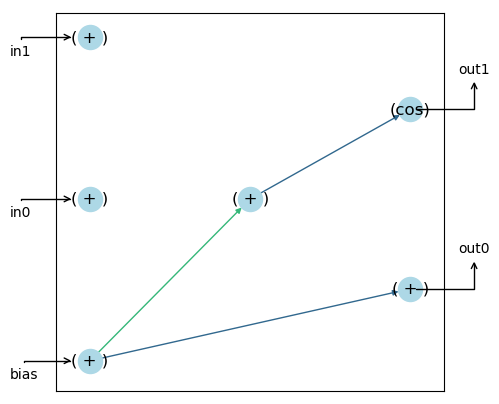

In [17]:
fig = viewInd(ind, 'xor', plt_height=5)

# of Connections in ANN:  4


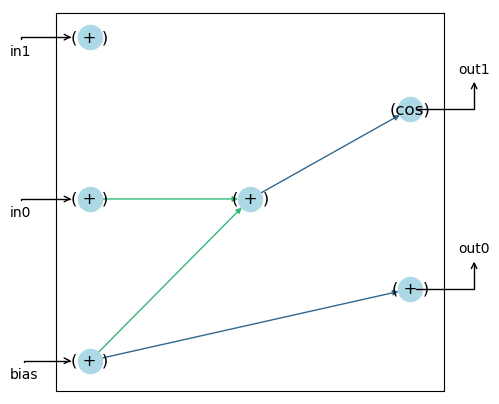

In [18]:
connG = ind.conn
nodeG = ind.node
innov = wann.innov
gen = 0

connG, innov = wann.mutAddConn(connG, nodeG, innov, gen)
mutInd = Ind(connG, nodeG)

fig = viewInd(mutInd, 'xor', plt_height=5)

## Topological Mutation

Args:

    child    - (Ind) - individual to be mutated
      .conns - (np_array) - connection genes
               [5 X nUniqueGenes] 
               [0,:] == Innovation Number (unique Id)
               [1,:] == Source Node Id
               [2,:] == Destination Node Id
               [3,:] == Weight Value
               [4,:] == Enabled?  
               
      .nodes - (np_array) - node genes
               [3 X nUniqueGenes]
               [0,:] == Node Id
               [1,:] == Type (1=input, 2=output 3=hidden 4=bias)
               [2,:] == Activation function (as int)
               
    innov    - (np_array) - innovation record
               [5 X nUniqueGenes]
               [0,:] == Innovation Number
               [1,:] == Source
               [2,:] == Destination
               [3,:] == New Node?
               [4,:] == Generation evolved

# of Connections in ANN:  3


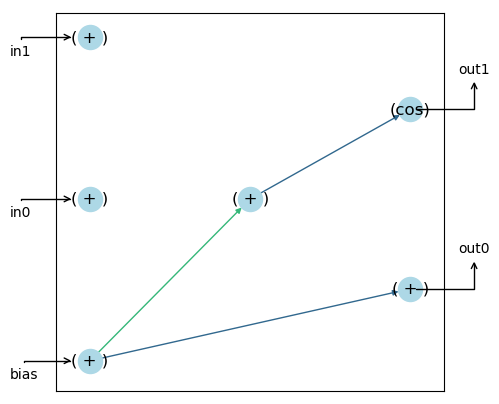

In [19]:
fig = viewInd(ind, 'xor', plt_height=5)

Choice: mutate activation
# of Connections in ANN:  3


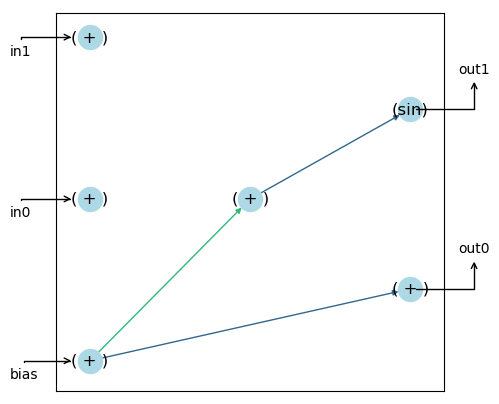

In [26]:
connG = ind.conn
nodeG = ind.node
innov = wann.innov
gen = 0

wann.verbose = True
child, innov = wann.topoMutate(ind, innov, gen)
wann.verbose = False

fig = viewInd(child, 'xor', plt_height=5)